<a href="https://colab.research.google.com/github/PankajBGadge/Netflix-Movies-and-TV-Shows-clustering/blob/main/Pankaj_B_GadgeNetflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

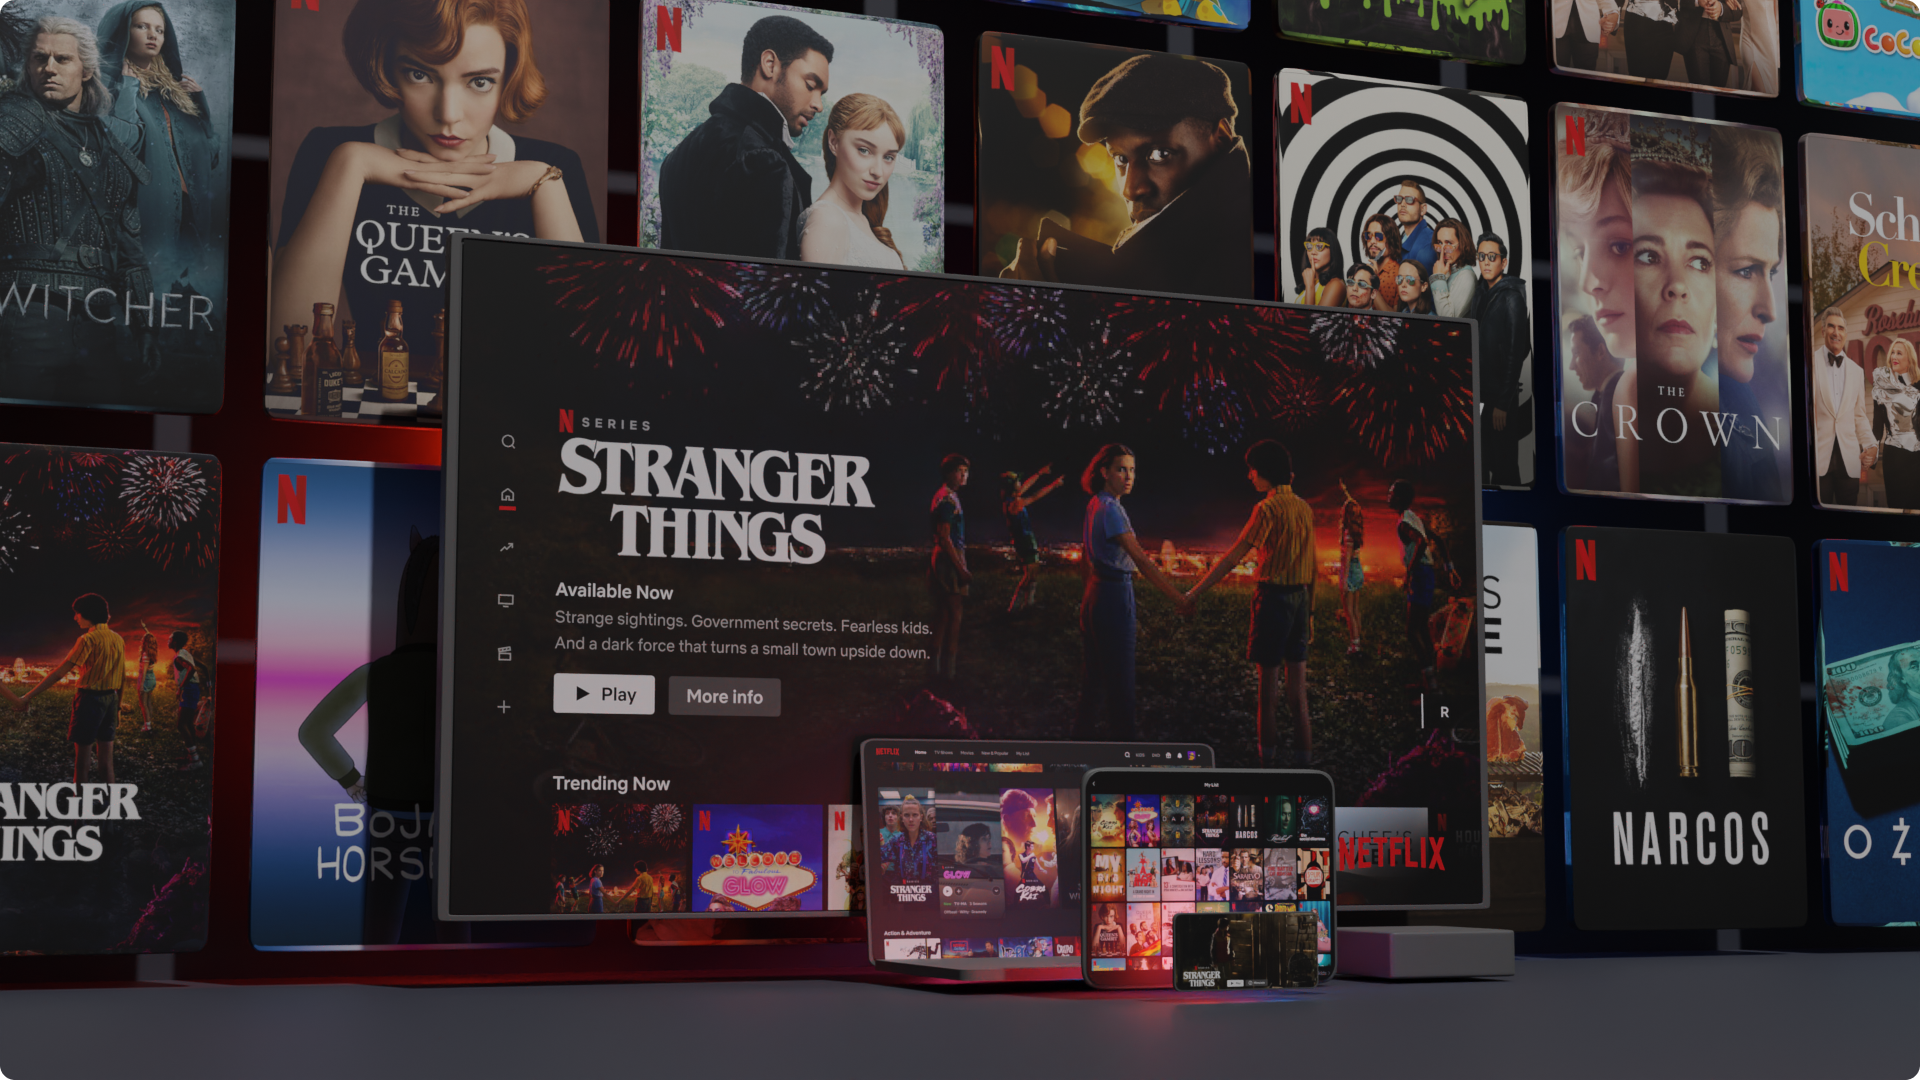

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Let's Start**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Netflix_dataset=pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Clustering-Pankaj Gadge/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
Netflix_dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
Netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


From the info, we know that there are 6,234 entries and 12 columns to work with for this EDA. There are a few columns that contain null values, “director,” “cast,” “country,” “date_added,” “rating.”

There are a total of 3,036 null values across the entire dataset with 1,969 missing points under “director” 570 under “cast,” 476 under “country,” 11 under “date_added,” and 10 under “rating.” We will have to handle all null data points before we can dive into EDA and modeling.

# **Data Processing**

In [ ]:
Netflix_dataset.director.fillna("No Director", inplace=True)
Netflix_dataset.cast.fillna("No Cast", inplace=True)
Netflix_dataset.country.fillna("Country Unavailable", inplace=True)
Netflix_dataset.dropna(subset=["date_added", "rating"], inplace=True)

The easiest way to get rid of them would be to delete the rows with the missing data for missing values. However, this wouldn’t be beneficial to our EDA since it is a loss of information. Since “director,” “cast,” and “country” contain the majority of null values, we chose to treat each missing value is unavailable. The other two label “date_added” and “rating” contain an insignificant portion of the data, so it drops from the dataset. Finally, we can see that there are no more missing values in the data frame.

In [ ]:
Netflix_dataset.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [ ]:
Netflix_dataset.describe()

release_year
count   7770.000000
mean    2013.935393
std        8.764357
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

# **Splitting Dataset**

Here we can split data as movies and TV shows for EDA

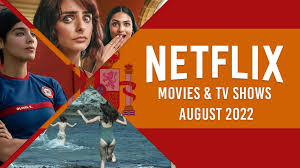

**Netflix Movies**

In [ ]:
netflix_movies = Netflix_dataset[Netflix_dataset['type']=='Movie'].copy()
netflix_movies.head()

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year rating duration  \
1  December 23, 2016          2016  TV-MA   93 min   
2  December 20, 2018          2011      R   78 min   
3  November 16, 2017          2009  PG-13   80 min   
4    January 1, 2020          2008  PG-13  123 min   
6       June 1, 2020          2019  TV-MA   95 min   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
6                Horror Movies, International Movies   

                                         description  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
6  After an awful accident, a couple admitted to ...

**Netflix TV Shows**

In [ ]:
netflix_shows = Netflix_dataset[Netflix_dataset['type']=='TV Show'].copy()
netflix_shows.head()

show_id     type   title              director  \
0       s1  TV Show      3%           No Director   
5       s6  TV Show      46           Serdar Akar   
11     s12  TV Show    1983           No Director   
12     s13  TV Show    1994  Diego Enrique Osorno   
16     s17  TV Show  Feb-09           No Director   

                                                 cast                country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
12                                            No Cast                 Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...    Country Unavailable   

           date_added  release_year rating   duration  \
0     August 14, 2020          2020  TV-MA  4 Seasons   
5        July 1, 2017          2016  TV-MA   1 Season   
11  November 30, 2018          2018  TV-MA   1 Season   
12       May 17, 2019          2019  TV-MA   1 Season   
16     March 20, 2019          2018  TV-14   1 Season   

                                            listed_in  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
5     International TV Shows, TV Dramas, TV Mysteries   
11  Crime TV Shows, International TV Shows, TV Dramas   
12  Crime TV Shows, Docuseries, International TV S...   
16                  International TV Shows, TV Dramas   

                                          description  
0   In a future where the elite inhabit an island ...  
5   A genetics professor experiments with a treatm...  
11  In this dark alt-history thriller, a naïve law...  
12  Archival video and new interviews examine Mexi...  
16  As a psychology professor faces Alzheimer's, h...

## **EDA**

**Netflix is an application that keeps growing exponentially whole around the world and it is the most famous streaming platform.**
**Let’s create an EDA through this data with beautiful charts and visuals to gain some insights.**

# **Movies Vs TV Shows**

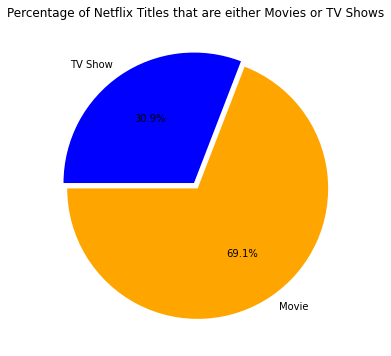

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Percentage of Netflix Titles that are either Movies or TV Shows')
plt.pie(Netflix_dataset.type.value_counts(),explode=(0.025,0.025), labels=Netflix_dataset.type.value_counts().index, colors=['orange','blue'],autopct='%1.1f%%', startangle=180)
plt.show()

**Most of the audience prefers Movies over TV Show as 69.1 percentage of audience like Movies and 30.1 percentage of audiance like TV shows.**



# **Release year and release months with contents available**

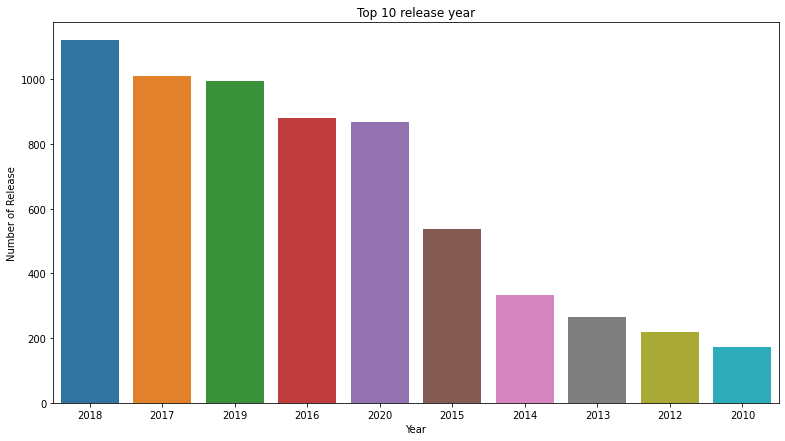

In [ ]:
plt.figure(figsize=(13,7))
g = sns.countplot(x = Netflix_dataset['release_year'], order=Netflix_dataset['release_year'].value_counts().index[:10])
plt.title('Top 10 release year')
plt.xlabel('Year')
plt.ylabel('Number of Release')
plt.show()

After the year 2019 covid came that badly affects Netflix for producing content. Movies have exponential growth from the start but due to covid, it is going downwards.

In [ ]:
#adding columns of month and year of addition

Netflix_dataset['Month'] = pd.DatetimeIndex(Netflix_dataset['date_added']).month
Netflix_dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%        No Director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  Month  
0  In a future where the elite inhabit an island ...      8  
1  After a devastating earthquake hits Mexico Cit...     12  
2  When an army recruit is found dead, his fellow...     12  
3  In a postapocalyptic world, rag-doll robots hi...     11  
4  A brilliant group of students become card-coun...      1

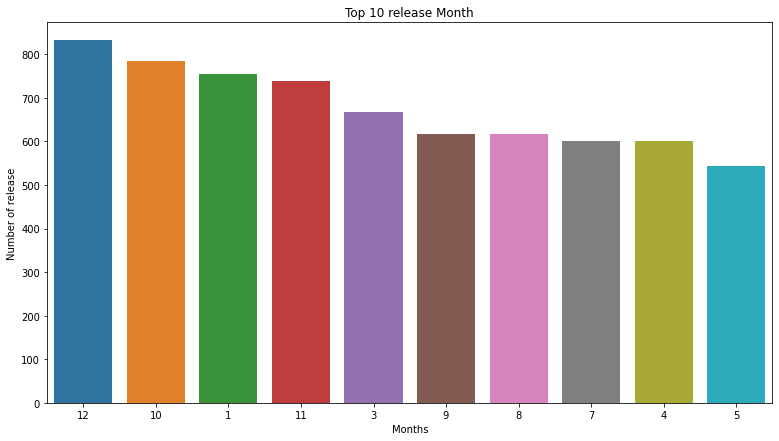

In [ ]:

# Plotting the Countplot 
plt.figure(figsize=(13,7))
g = sns.countplot(x = Netflix_dataset['Month'], order=Netflix_dataset['Month'].value_counts().index[:10])
plt.title('Top 10 release Month')
plt.xlabel('Months')
plt.ylabel('Number of release')
plt.show()


The best month to release content so the producer can gain much revenue. Most of the holidays came in December and Jan month in US and Europe.Most of the holidays came in India in Oct month.So to releases a Movie or TV show in between Oct to Jan  is the best way to earn a lot of profit as the whole family will be spending time with each other and watching shows.
The best 4 months to release content are October,  November, December, and January.

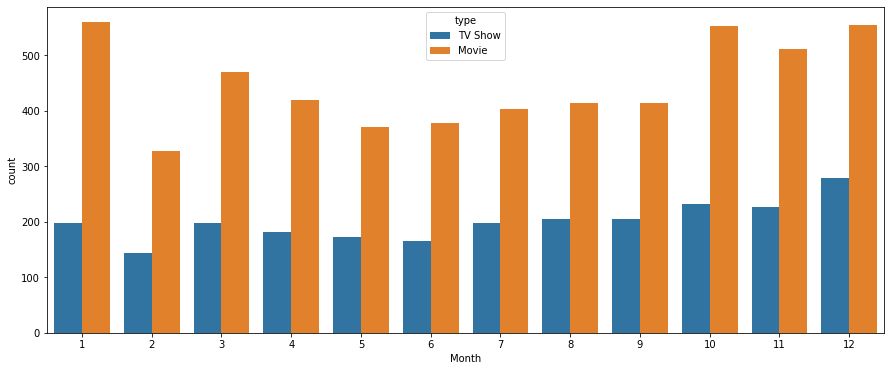

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='Month', hue='type',lw=5, data=Netflix_dataset, ax=ax)

Rate of movies release is more as compared to the TV shows.

# **Top Contributor Countries on Netflix**

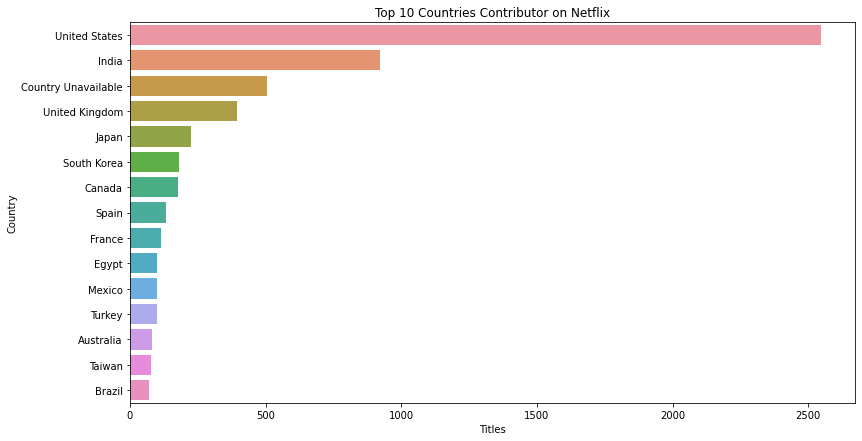

In [ ]:
plt.figure(figsize=(13,7))
g = sns.countplot(y = Netflix_dataset['country'], order=Netflix_dataset['country'].value_counts().index[:15])
plt.title('Top 10 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

**From the  above bar graph, we can see the top 15 countries which contributes most on Netflix. The country by the amount of the produces content is the United States.**

# **Top 10 Directors**

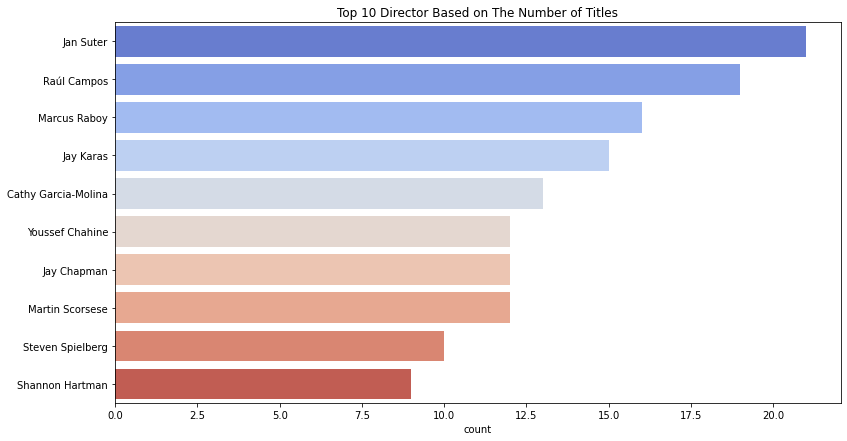

In [ ]:
filtered_directors = Netflix_dataset[Netflix_dataset.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='coolwarm')
plt.show()

**The most popular director on Netflix, with the most titles, is Jan Suter and next is Raul Compos.**

# **Genres**

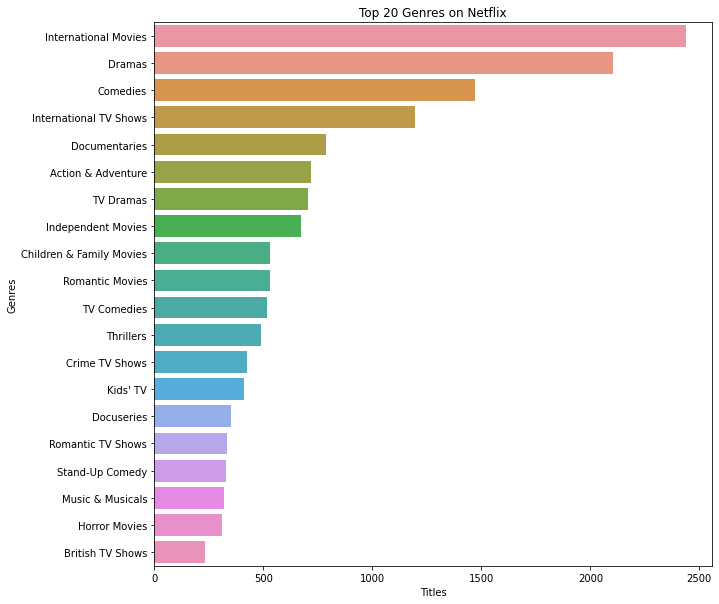

In [ ]:
filtered_genres = Netflix_dataset.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres,order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

From the graph, we know that International Movies take the first place, followed by dramas and comedies.

# **Rating**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


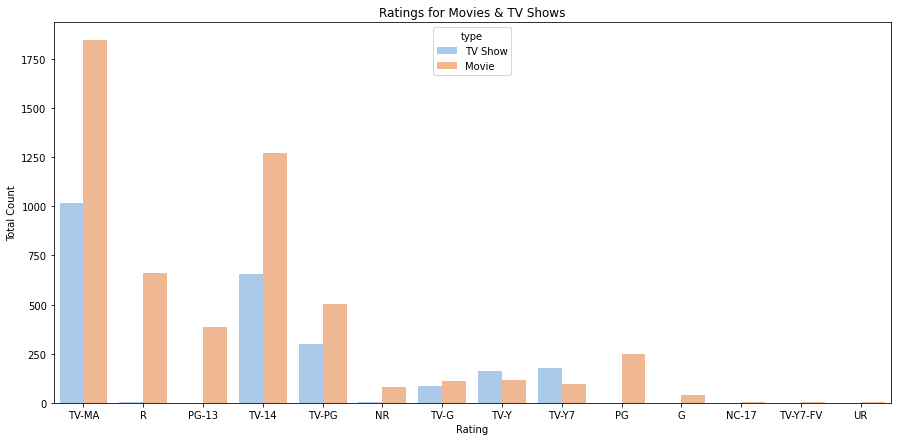

In [ ]:
plt.figure(figsize=(15,7))
g = sns.countplot(Netflix_dataset.rating, hue=Netflix_dataset.type, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

The largest count of TV shows is made with a “TV-MA” rating. “TV-MA” is a rating assigned by the TV Parental Guidelines to a television program designed for mature audiences only.

# **Top actors on Movies and Netflix**

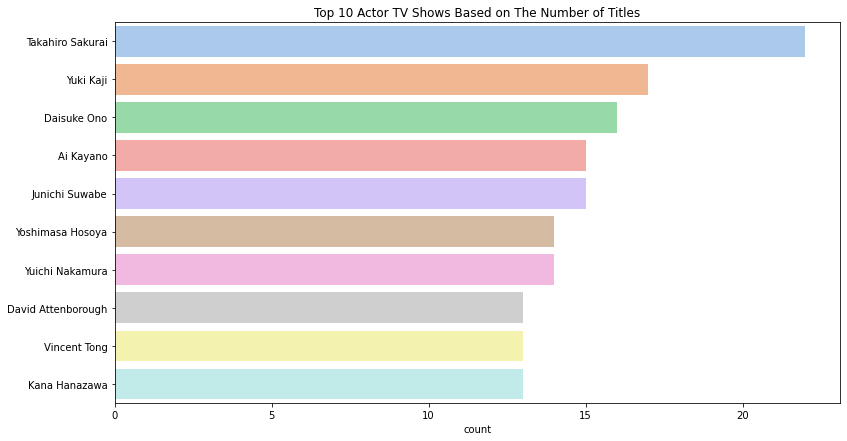

In [ ]:
filtered_cast_shows = netflix_shows[netflix_shows.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

The top actor on Netflix TV Show, based on the number of titles, is Takahiro Sakurai.

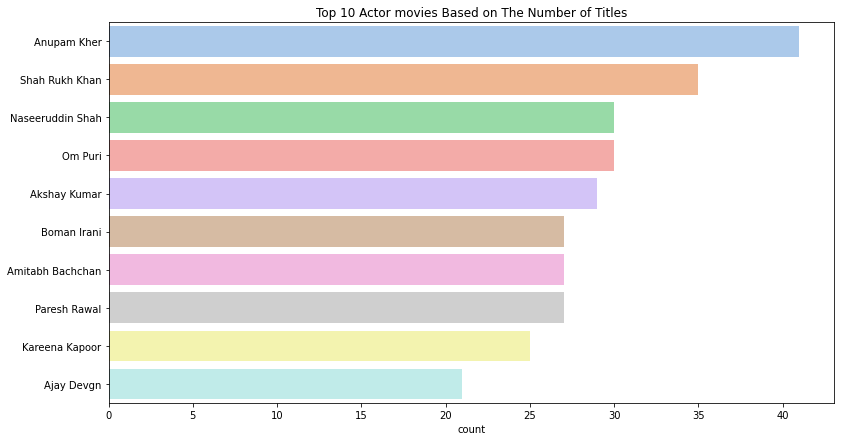

In [ ]:
filtered_cast_movies = netflix_movies[netflix_movies.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movies, order=filtered_cast_movies.value_counts().index[:10], palette='pastel')
plt.show()

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.

# **Countries with contents available**

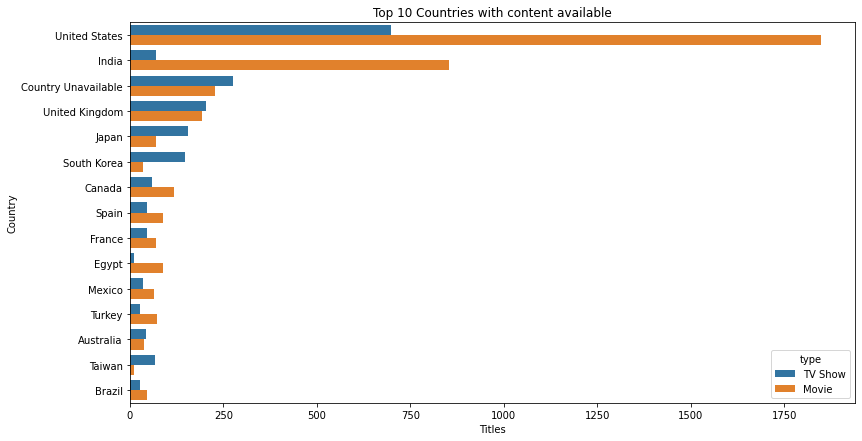

In [ ]:
filtered_genres = Netflix_dataset.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(13,7))
g = sns.countplot(y = Netflix_dataset['country'], hue=Netflix_dataset['type'],order=Netflix_dataset['country'].value_counts().index[:15])
plt.title('Top 10 Countries with content available')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

From the above graph it is clear that in  US and India people mostly like movies over TV shows while people in UK,Japan,South Korea likes TV shows over movies.

# **Distribution of Movies and TV shows Duration**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


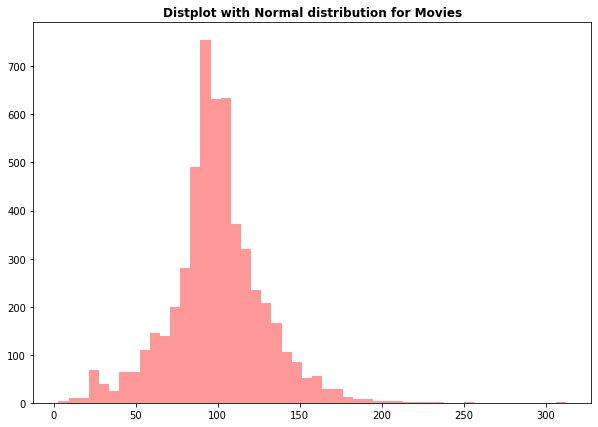

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(netflix_movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

most of the movies have duration of between 50 to 150

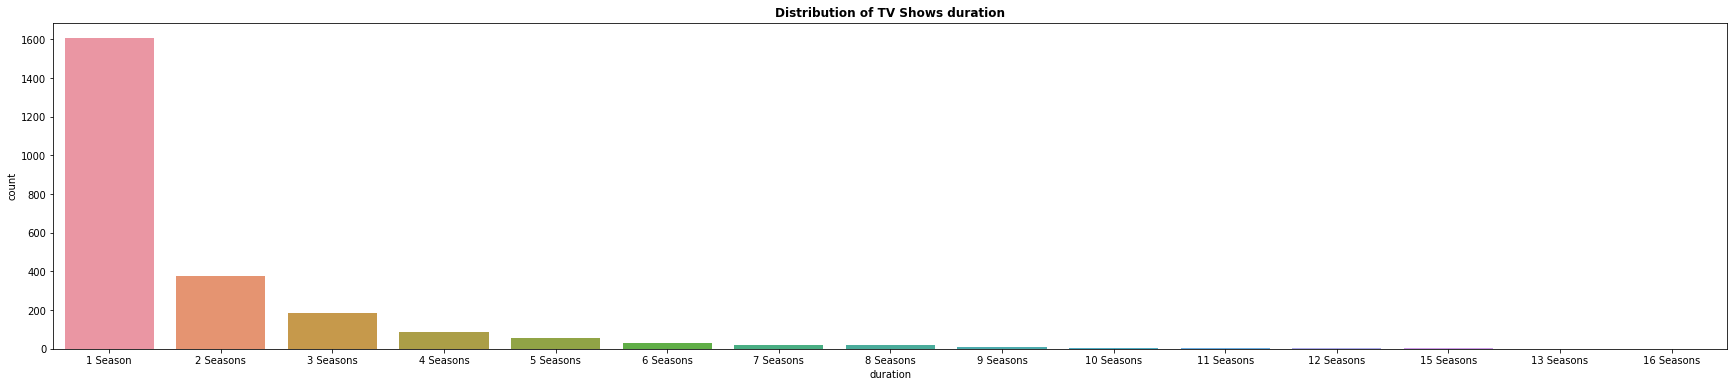

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=netflix_shows['duration'],data=netflix_shows,order = netflix_shows['duration'].value_counts().index)

# **Netflix Contents available for different age groups with different countries**

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
Netflix_dataset['target_ages'] = Netflix_dataset['rating'].replace(ratings)

# **Correlation Heatmap**

In [ ]:
# type should be a catego

Netflix_dataset['target_ages'] = pd.Categorical(Netflix_dataset['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
Netflix_dataset['count'] = 1
data = Netflix_dataset.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

Netflix_dataset_heatmap = Netflix_dataset.loc[Netflix_dataset['country'].isin(data)]
Netflix_dataset_heatmap = pd.crosstab(Netflix_dataset_heatmap['country'], Netflix_dataset_heatmap['target_ages'],normalize = "index").T
Netflix_dataset_heatmap

country        Canada  Country Unavailable     Egypt    France     India  \
target_ages                                                                
Kids         0.180791             0.170297  0.000000  0.095652  0.016251   
Older Kids   0.225989             0.235644  0.039604  0.060870  0.160347   
Teens        0.146893             0.275248  0.683168  0.165217  0.567714   
Adults       0.446328             0.318812  0.277228  0.678261  0.255688   

country         Japan  South Korea     Spain  United Kingdom  United States  
target_ages                                                                  
Kids         0.008929     0.027322  0.022388        0.093434       0.073449  
Older Kids   0.272321     0.120219  0.044776        0.204545       0.187353  
Teens        0.352679     0.382514  0.097015        0.189394       0.236842  
Adults       0.366071     0.469945  0.835821        0.512626       0.502357

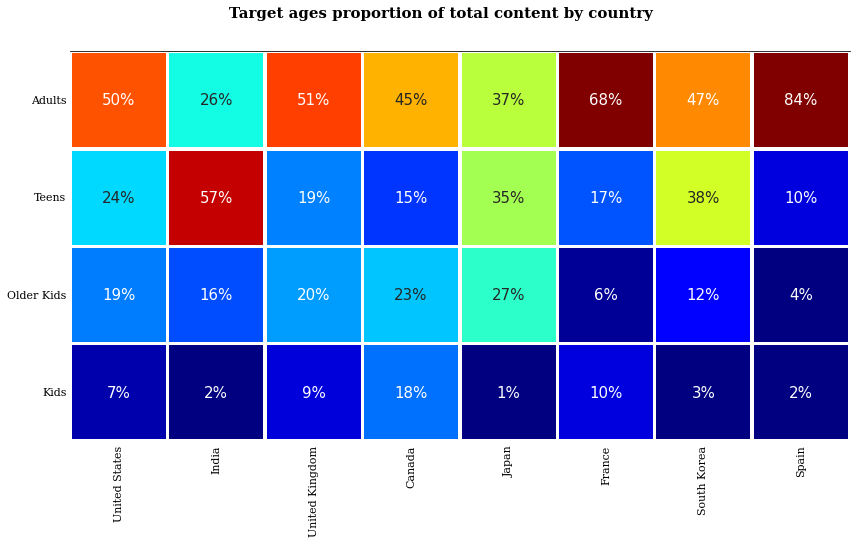

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(Netflix_dataset_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

From the corr. graph it is clear that in Spain,France,UK and US mostly adults peoples like to watch moveies and TV shows.

While in India 57 percentage of teens watching movies and TV shows and only 26 percentage of adults like to watching movies and TV shows.


That means in India Netflix need to more concentrate to Teens.

# **India**

In [ ]:
import pandas
print(pandas.__version__)

1.3.5


In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
grp = Netflix_dataset.groupby('country')
India=grp.get_group('India')

In [ ]:
plt.figure(figsize=(13,7))
g = sns.countplot(x = India['release_year'], order=India['release_year'].value_counts().index[:10])
plt.title('Top 10 release year')
plt.xlabel('Year')
plt.ylabel('Number of Release')
plt.show()

In [ ]:
plt.figure(figsize=(13,7))
g = sns.countplot(x = India['rating'], order=India['rating'].value_counts().index[:10])
plt.title('Top 10 rating')
plt.xlabel('Year')
plt.ylabel('Number of Release')
plt.show()

In [ ]:
filtered_genres1 = India.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres1,order=filtered_genres1.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
g = sns.countplot(India.rating, hue=India.type, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

In [ ]:
Netflix_dataset.columns

In [ ]:

new_Netflix_dataset = Netflix_dataset.drop(columns=['show_id','director', 'title', 'cast','duration', 'date_added', 'description'],axis=1)
new_Netflix_dataset

# **Data Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_Netflix_dataset["type"] = le.fit_transform(new_Netflix_dataset["type"])
new_Netflix_dataset["country"] = le.fit_transform(new_Netflix_dataset["country"])
new_Netflix_dataset["target_ages"] = le.fit_transform(new_Netflix_dataset["target_ages"])
new_Netflix_dataset['rating'] = le.fit_transform(new_Netflix_dataset['rating'])
new_Netflix_dataset['listed_in'] = le.fit_transform(new_Netflix_dataset['listed_in'])

# **Data Standarization**

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [ ]:
# transform the data using StandardScaler

X = pd.DataFrame(StandardScaler().fit_transform(new_Netflix_dataset),columns = new_Netflix_dataset.columns)


In [ ]:
X.shape

In [ ]:
type(X)

# **PCA**

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# function to understand the variance for different n_components
def pca_variance(n_components):
  pca= PCA(n_components= n_components)
  pca.fit(X)
  print(sum(pca.explained_variance_ratio_))

In [ ]:
pca_variance(7)

In [ ]:
pca = PCA(n_components=7)
pca.fit(X)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('No. of components VS Explained variance')

Typically, we want the explained variance to be between 95–99%.

In this case, to get 99%(most approximate is 100%)of variance explained I need 7 principal components

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

# **KMeans Clustering**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
kmeans = KMeans( init="k-means++", n_clusters=8, max_iter=300,   random_state=0)

# **Find out how many clusters are used?**

# **K-Elbow Method**

The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4162316e10>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 locate_elbow=False, timings=False)

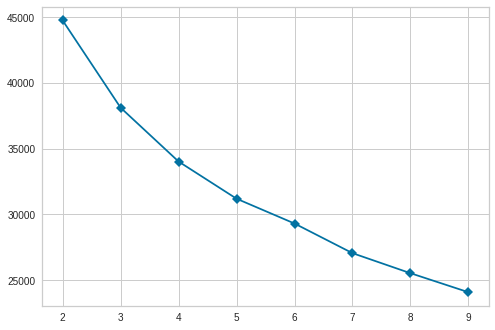

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric= 'distortion', timings= False, locate_elbow= False)
visualizer.fit(X)

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 4.

In [ ]:
import numpy as np

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4168016550>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 metric='silhouette', timings=False)

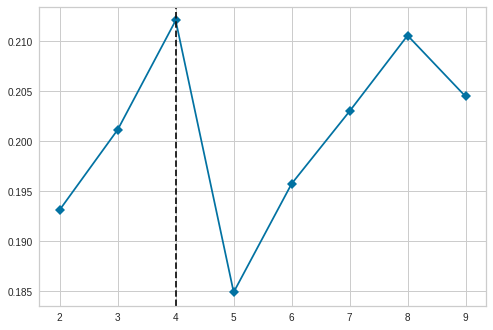

In [ ]:

visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette', timings=False, locate_elbow=True)
visualizer.fit(X)

# **Silhouette Score**

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters)
      preds = km.fit_predict(X)
      centers = km.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

In [ ]:
silhouette_score_analysis(8)

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

The value of 4 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores

In [ ]:
# looks like we can go with 4 clusters.

kmeans= KMeans(n_clusters=4, init= 'k-means++',max_iter=300, n_init=1)

kmeans.fit(X)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
labels = kmeans.fit_predict(X)

In [ ]:
# silhouette score of my clusters
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))

# **K Means Clustering**

In [ ]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=4, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X_pca)

In [ ]:
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X_pca, kmeans.labels_))

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(X_pca)

In [ ]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

# **Hirarchical clustering**

Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.axhline(y=75)

Assume we cut vertical lines with a horizontal line to obtain the number of clusters.
Number of clusters = 5

# **Agglomerative CLustering**

The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets.

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_pca)


In [ ]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X_pca[y_hc == 0, 0], X_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X_pca[y_hc == 1, 0], X_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X_pca[y_hc == 2, 0], X_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X_pca[y_hc == 3, 0], X_pca[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
#plt.scatter(X_pca[y_hc == 4, 0], X_pca[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of Netflix')
plt.legend()
plt.show()

# **Conclusion**

We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:

1. The most content type on Netflix is movies.It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows

2. There are about 70% movies and 30% TV shows on Netflix.

3. Most films were released in the years 2018, 2019, and 2020.

4. The number of releases have significantly increased after 2015 and have dropped in 2021 because of Covid 19.

5. The months of October, November, December and January had the largest number of films and television series released.

6. More of the content is released in holiday season - October, November, December and January.
 
7. The United States has the highest number of content on Netflix by a huge margin followed by India.

8. Raul Campos and Jan Sulter collectively have directed the most content on Netflix.

9. Anupam Kher has acted in the highest number of films on Netflix. Drama is the most popular genre followed by comedy.

10. International movies are the top most genre in netflix which is fllowed by standup comedy and Drams. 

11. Most of the movies have duration of between 50 to 150

12. Highest number of tv_shows consistig of single season

13. Using correlation heatmap we see that in India mostly teens watching netflix so question arrises that what content teens watched.

14. TV-MA has the highest number of ratings for tv shows i,e adult ratings

15. In India teens mostly watched international movies.

16. Principal Component analysis (PCA)reduced the number of componets as 7 with approximately 99% of variance.

17. For K Means clustering to find out number of k we used elbow and sillhoute score method.

18. Using both the methods we found k=4 is optimal value of clustering.

19. Using Hirarchical clustering method again we find out that k=4 is optimal value of clustering.